In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [69]:
# def U(A, alpha):
#     u = 0
#     for i in range(len(A)):
#         for j in range(len(A)):
#             if i != j:
#                 distance = math.sqrt((A[i][0] - A[j][0])**2 + (A[i][1] - A[j][1])**2) 
#                 u += (1 / (distance**alpha))
#     return u

def U(A, alpha, distance_matrix):
    u = 0
    for i in range(len(A)):
        for j in range(len(A)):
            if i != j:
                distance = distance_matrix[i][j]
                u += (1 / (distance**alpha))
    return u

In [70]:
def C(a, A, alpha, U_value, distance_matrix):
    Ax = np.delete(A, a, axis=0) # Arreglo a excluyendo al elemento a
    c = U_value - U(Ax, alpha, distance_matrix)
    return c

In [78]:
def getSstar(A, alpha, n):
  Sstar = A.copy() # copiar matriz para borrar los elementos más grandes de C en cada iteración del while
  c_values = [] # valores de C calculados por índice

  distance_matrix = np.zeros((len(A), len(A))) # matriz de distancias euclideanas

  for i in range(len(A)):
      for j in range(len(A)):
          if i != j:
              distance_matrix[i][j] = (math.sqrt((A[i][0] - A[j][0])**2 + (A[i][1] - A[j][1])**2))**alpha

  while len(Sstar) > n:
    U_value = U(Sstar, alpha, distance_matrix)
    # calcular C para cada elemento de S*
    for i in range(len(Sstar)):
        c_values.append(C(i, Sstar, alpha, U_value, distance_matrix))

    # encontrar el índice con mayor valor de C y eliminarlo de la lista
    index_max_value = c_values.index(max(c_values))
    Sstar = np.delete(Sstar, index_max_value, axis=0)
    c_values.clear()

  return Sstar

In [85]:
alpha = 2
A = np.loadtxt('ZCAT1_1000_02D.pof')[:100]
n = 50

Sstar = getSstar(A, alpha, n)

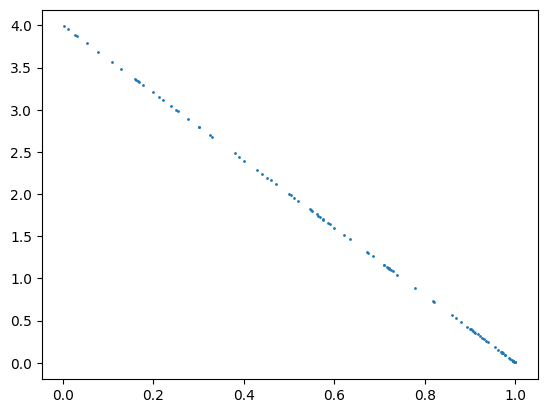

In [86]:
# scatter plot original
plt.scatter(A[:, 0], A[:, 1], s=1)
plt.show()

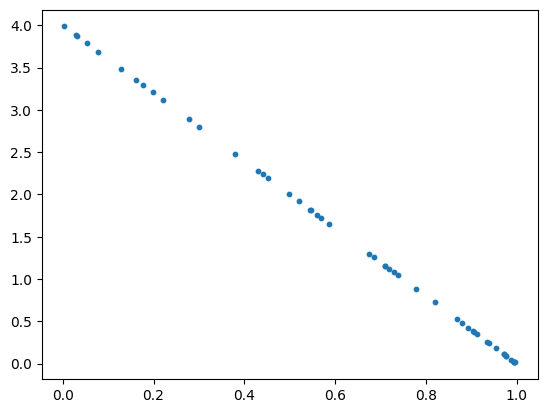

In [87]:
# scatter plot con S*
plt.scatter(Sstar[:, 0], Sstar[:, 1], s=10)
plt.show()